Импортируем нужные библиотеки для анализа, визуализации и проведения тестов статистичеких гипотез

In [818]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency

Создаём 2 таблицы, которые будут содержать всю информацию из наших файлов

In [529]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

Для ознакомления с таблицами и записями в них выведем первые 5 строк для каждой из таблиц с помощью функции head()

In [456]:
print(observations.head())
print('------------------------------------------------------------------------------')
print(species.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
------------------------------------------------------------------------------
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                         

Чтобы получить подробную информацию о таблицах, наличии пропущенных значений, воспользуемся функциями describe() и info()

Чтобы понять сколько уникальных значений содержат каждый столбец таблицы, воспользуемся функцией nunique()

In [845]:
print(observations.describe())
print('\n\n')
print(observations.info())
print('\n\n')
print(species.info())

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory

In [834]:
print("Таблица species")
print(species.nunique())
print('---------------------------')
print("Таблица observations")
print(observations.nunique())

Таблица species
category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64
---------------------------
Таблица observations
scientific_name    5541
park_name             4
observations        304
dtype: int64


Из предыдущей команды видно, что в таблице species для анализа и визуализации подойдут 2 столбца: category и observations. Для более подробного ознакомления с содержимым этих столбцов воспользуемся функцией unique()

In [838]:
unique_conservation_statuses = species['conservation_status'].unique()
print(unique_conservation_statuses)
unique_categories = species['category'].unique()
print(unique_categories)

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Далее мы будем строить графики для столбцов category и observations. Поэтому, для удобства и последующей группировки создадим отдельную таблицу, состоящую из этих 2 столбцов

In [459]:
category_conservation_status = species[['category', 'conservation_status']]
print(category_conservation_status)

            category conservation_status
0             Mammal                 NaN
1             Mammal                 NaN
2             Mammal                 NaN
3             Mammal                 NaN
4             Mammal                 NaN
...              ...                 ...
5819  Vascular Plant                 NaN
5820  Vascular Plant                 NaN
5821  Vascular Plant                 NaN
5822  Vascular Plant                 NaN
5823  Vascular Plant                 NaN

[5824 rows x 2 columns]


Первый график будет показывать нам, из каких значений состоят столбцы таблицы "category_conservation_status" и соотношение этих значений. С этой целью создадим 2 сводные таблицы. Одну сводную таблицу будем группировать по category, вторую - по conservation_status. Также, воспользуемся функцией count() для подсчёта значений

In [754]:
group_status = category_conservation_status.groupby('conservation_status', as_index = False).count()
group_status.columns = ['conservation_status', 'count']
group_status = group_status.sort_values(by = 'count', ascending = False)
group_category = category_conservation_status.groupby('category', as_index = False).count()
group_category.columns = ['category', 'count']
group_category = group_category.sort_values(by = 'count', ascending = False)

Напечатаем созданные сводные таблицы

In [757]:
print(group_status)
print('-----------------------------------')
print(group_category)

  conservation_status  count
2  Species of Concern    161
0          Endangered     16
3          Threatened     10
1         In Recovery      4
-----------------------------------
            category  count
1               Bird     79
6     Vascular Plant     46
3             Mammal     38
2               Fish     11
0          Amphibian      7
4  Nonvascular Plant      5
5            Reptile      5
0.41361256544502617


После того, как мы сгруппировали все необходимые данные, можем приступить к их визуализации. Построим по одной столбчатой диаграмме для каждой сводной таблицы

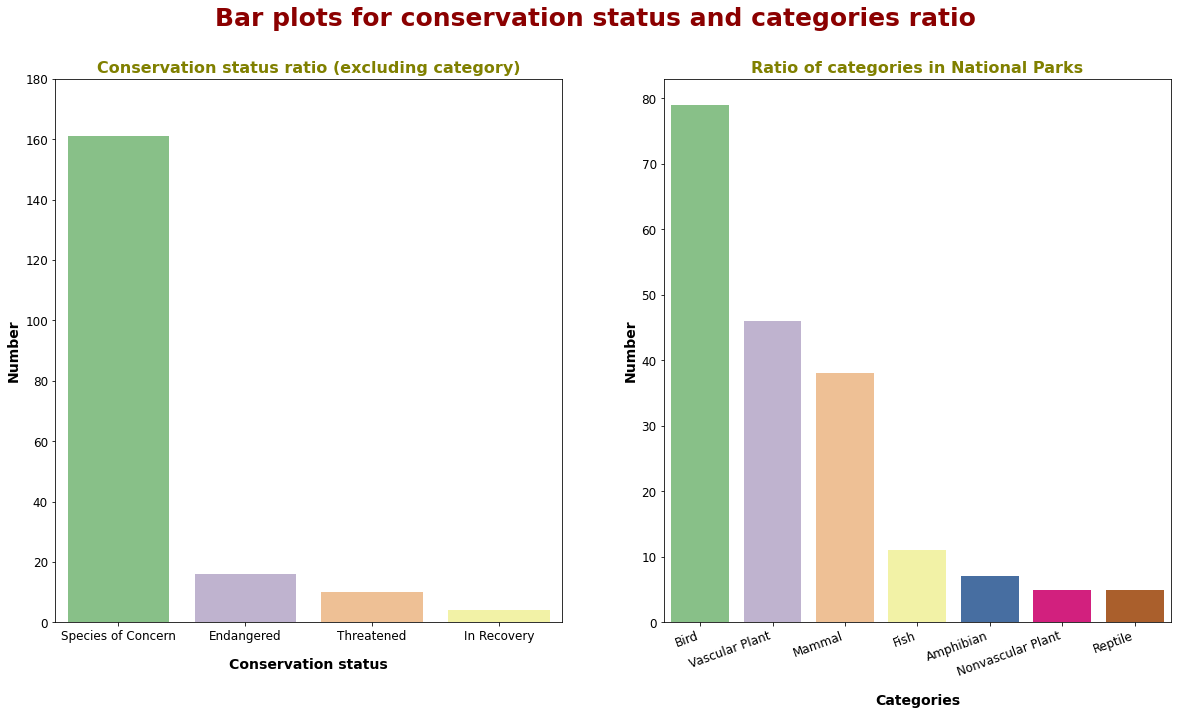

<Figure size 432x288 with 0 Axes>

In [758]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Bar plots for сonservation status and categories ratio', fontsize = 25, color = 'darkred', fontweight = 'bold')
sns.set_palette("Accent")

sns.barplot(ax = ax1, data = group_status, x = group_status['conservation_status'].values, y = group_status['count'].values, order = group_status.sort_values('count',  ascending = False).conservation_status)
ax1.set_xticks([0, 1, 2, 3])
ax1.set_xticklabels(group_status['conservation_status'].values, fontsize = 12)
ax1.set_yticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180])
ax1.set_yticklabels([0, 20, 40, 60, 80, 100, 120, 140, 160, 180], fontsize = 12)
ax1.set_title('Сonservation status ratio (excluding category)', color = 'olive', fontweight = 'bold', fontsize = 16)
ax1.set_xlabel('Conservation status', labelpad = 15, fontweight = 'bold', fontsize = 14)
ax1.set_ylabel('Number', fontweight = 'bold', fontsize = 14)

sns.barplot(ax = ax2, data = group_category, x = group_category['category'].values, y = group_category['count'].values, order = group_category.sort_values('count',  ascending = False).category)
ax2.set_xticks(range(len(group_category)))
ax2.set_xticklabels(group_category['category'].values, rotation = 20, ha = 'right', fontsize = 12)
ax2.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
ax2.set_yticklabels([0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize = 12)
ax2.set_title('Ratio of categories in National Parks', color = 'olive', fontweight = 'bold', fontsize = 16)
ax2.set_xlabel('Categories', labelpad = 15, fontweight = 'bold', fontsize = 14)
ax2.set_ylabel('Number', fontweight = 'bold', fontsize = 14)

plt.show()
fig.savefig('a.png')
plt.clf()

Проделаем то же самое, только в виде круговой диаграммы, которая покажет нам процентное соотношение значений

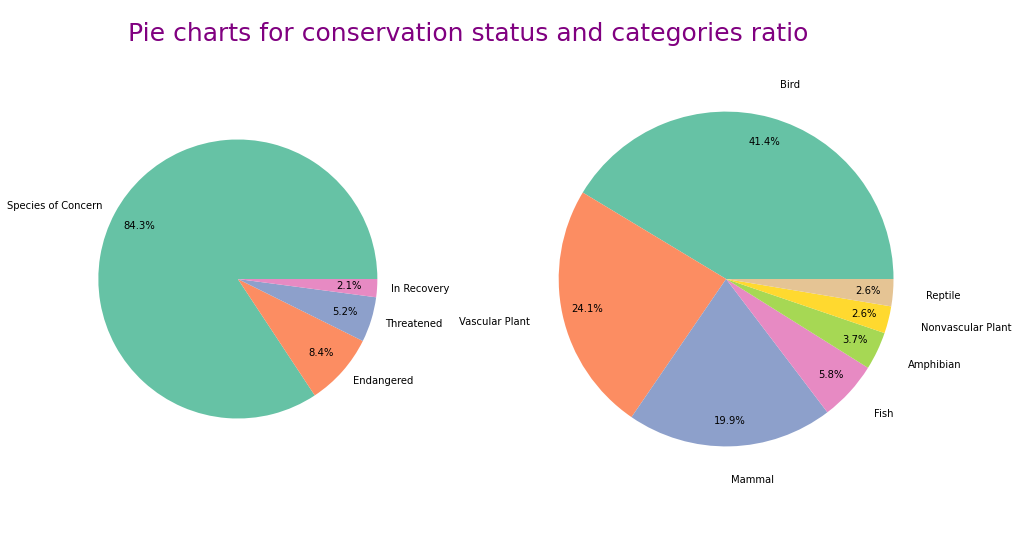

<Figure size 432x288 with 0 Axes>

In [835]:
fig, (axe1, axe2) = plt.subplots(1, 2, figsize = (15, 10))
fig.suptitle('Pie charts for сonservation status and categories ratio', fontsize = 25, y = 0.86, color = 'purple')
sns.set_palette("Paired")

axe1.pie(group_status['count'].values, labels = group_status['conservation_status'].values, autopct='%1.1f%%', pctdistance = 0.8, radius = 1)
plt.axis('equal')

axe2.pie(group_category['count'].values, labels = group_category['category'].values, autopct='%1.1f%%', pctdistance = 0.85, radius = 1.2, labeldistance=1.2)

plt.subplots_adjust(wspace = 0.4)
plt.show()
plt.clf()

Из таблицы "category_conservation_status" можно увидеть, что в столбце conservation_status есть пропущенные значения. Создадим новую таблицу "category_conservation_status_not_null", не содержащую пропущенных значений

In [541]:
category_conservation_status_not_null = \
category_conservation_status[category_conservation_status.conservation_status.isnull() != True]
print(category_conservation_status_not_null)

            category conservation_status
7             Mammal  Species of Concern
8             Mammal          Endangered
9             Mammal          Endangered
29            Mammal  Species of Concern
30            Mammal  Species of Concern
...              ...                 ...
5302  Vascular Plant  Species of Concern
5399  Vascular Plant  Species of Concern
5426  Vascular Plant  Species of Concern
5436  Vascular Plant  Species of Concern
5676  Vascular Plant  Species of Concern

[191 rows x 2 columns]


Создадим ещё одну сводную таблицу на основе "category_conservation_status_not_null". Но в этот раз будем будем группировать сразу по двум столбцам, чтобы понять, как охранные статусы распределены между группами живых существ

In [465]:
category_conservation_status_grouped = category_conservation_status_not_null.groupby(['category', 'conservation_status'], as_index = False).size()
print(category_conservation_status_grouped)

             category conservation_status  size
0           Amphibian          Endangered     1
1           Amphibian  Species of Concern     4
2           Amphibian          Threatened     2
3                Bird          Endangered     4
4                Bird         In Recovery     3
5                Bird  Species of Concern    72
6                Fish          Endangered     3
7                Fish  Species of Concern     4
8                Fish          Threatened     4
9              Mammal          Endangered     7
10             Mammal         In Recovery     1
11             Mammal  Species of Concern    28
12             Mammal          Threatened     2
13  Nonvascular Plant  Species of Concern     5
14            Reptile  Species of Concern     5
15     Vascular Plant          Endangered     1
16     Vascular Plant  Species of Concern    43
17     Vascular Plant          Threatened     2


Построим на основе таблицы "category_conservation_status_grouped" две столбчатых диаграммы. Первая будет отражать распределение охранных статусов в пределах каждой группы живых существ. Вторая, наоборот, отражает распределение групп живых существ в пределах каждого охранного статуса

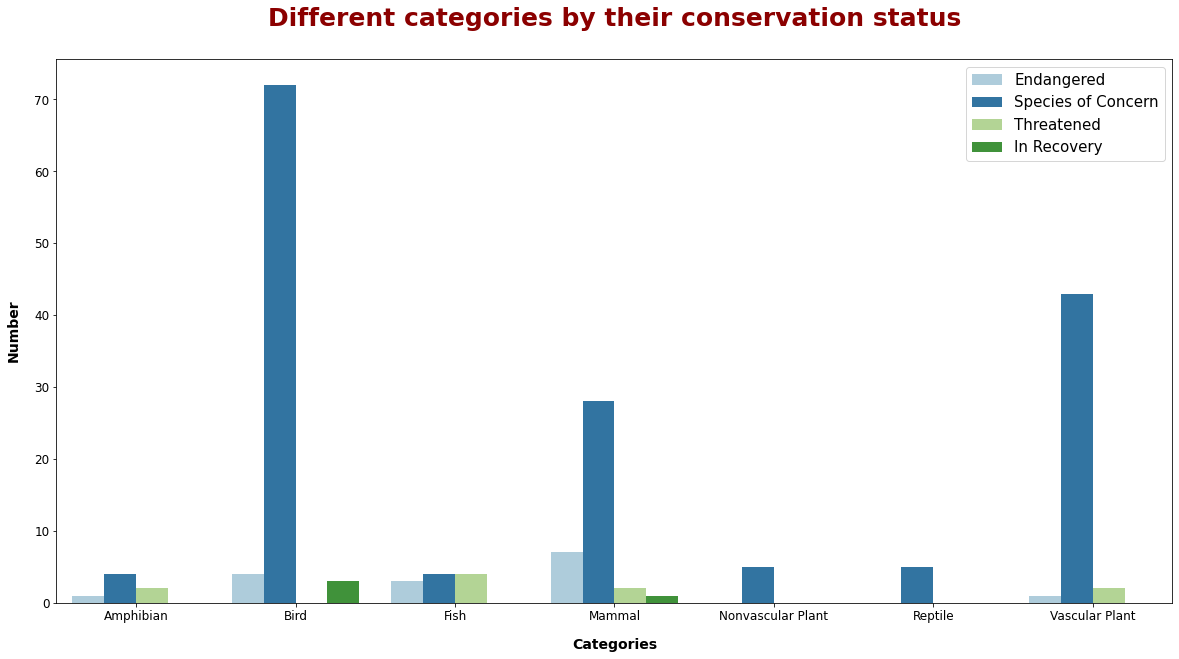

In [777]:
fig, ax1 = plt.subplots(figsize = (20, 10))
sns.set_palette("Paired")
sns.barplot(data = category_conservation_status_grouped,  x = 'category', y = 'size', hue = 'conservation_status')
ax1.legend(fontsize = 15, loc = 1)
ax1.set_xlabel('Categories', fontweight = 'bold', fontsize = 14, labelpad = 15)
ax1.set_ylabel('Number', fontweight = 'bold', fontsize = 14, labelpad = 13)
ax1.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax1.set_xticklabels(category_conservation_status_grouped['category'].unique(), fontsize = 12)
ax1.set_yticks([0, 10, 20, 30, 40, 50, 60, 70])
ax1.set_yticklabels([0, 10, 20, 30, 40, 50, 60, 70], fontsize = 12)
ax1.set_title('Different categories by their conservation status', fontsize = 25, color = 'darkred', fontweight = 'bold', y = 1.05)
plt.show()
fig.savefig('g.png')

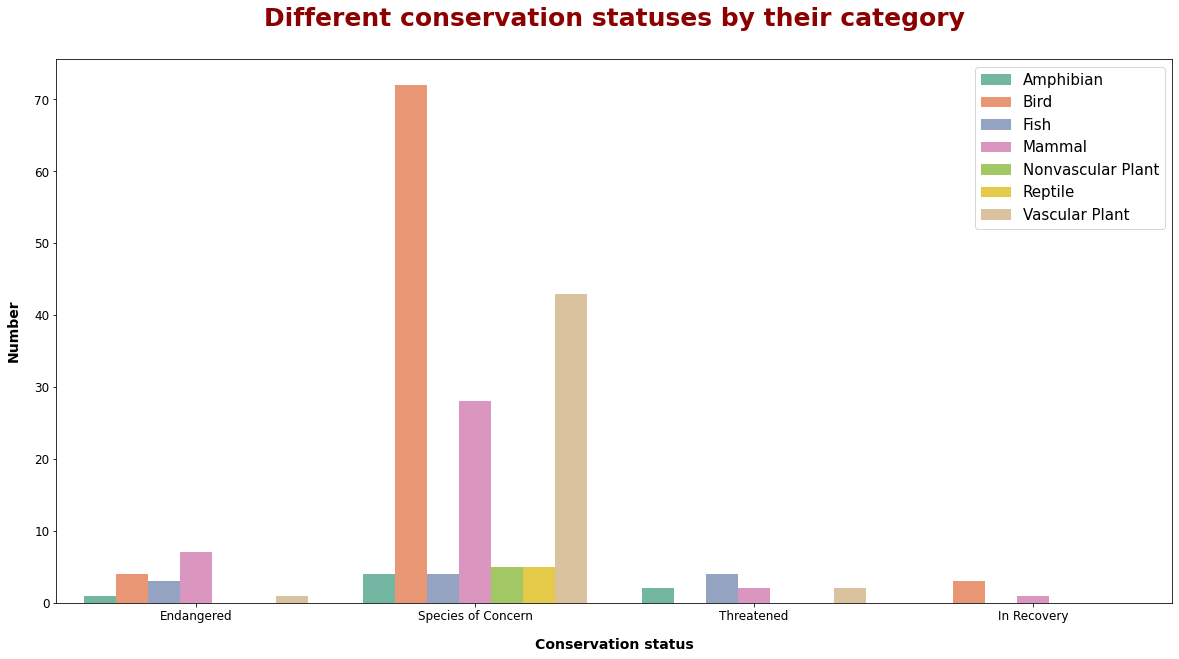

In [836]:
fig, ax1 = plt.subplots(figsize = (20, 10))
sns.set_palette("Set2")
sns.barplot(data = category_conservation_status_grouped,  x = 'conservation_status', y = 'size', hue = 'category')
ax1.legend(fontsize = 15, loc = 1)
ax1.set_xlabel('Conservation status', fontweight = 'bold', fontsize = 14, labelpad = 15)
ax1.set_ylabel('Number', fontweight = 'bold', fontsize = 14, labelpad = 13)
ax1.set_xticks([0, 1, 2, 3])
ax1.set_xticklabels(category_conservation_status_grouped['conservation_status'].unique(), fontsize = 12)
ax1.set_yticks([0, 10, 20, 30, 40, 50, 60, 70])
ax1.set_yticklabels([0, 10, 20, 30, 40, 50, 60, 70], fontsize = 12)
ax1.set_title('Different conservation statuses by their category', fontsize = 25, color = 'darkred', fontweight = 'bold', y = 1.05)
plt.show()
fig.savefig('g1.png')

Теперь перейдём к рассмотрению таблицы "observations". Ранее использованная команда nunique() показала, что в данной таблице столбец park_name содержит 4 уникальных значения. Его мы и будем анализировать. Для начала посмотрим все уникальные значения этого столбца

In [469]:
unique_park_names = observations['park_name'].unique()
print(unique_park_names)

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Создадим сводную таблицу "unique_park_names_grouped", сгруппированную по столбцу park_name и используем команду count()

In [470]:
unique_park_names_grouped = observations.groupby('park_name', as_index = False)['observations'].count()
unique_park_names_grouped.columns = ['park_name', 'Count']
print(unique_park_names_grouped)

                             park_name  Count
0                  Bryce National Park   5824
1  Great Smoky Mountains National Park   5824
2            Yellowstone National Park   5824
3               Yosemite National Park   5824


В таблице "observations" также содержится столбец observations, который показывает нам количество наблюдений в Национальном парке каждым из учёных. Создадим ещё одну сводную таблицу "unique_park_names_sum_of_obs_for_park", которая будет содержать общее количество проведённых наблюдений в каждом из парков

In [811]:
unique_park_names_sum_of_obs_for_park = observations.groupby('park_name', as_index = False)['observations'].sum()
unique_park_names_sum_of_obs_for_park.columns = ['park_name', 'Number of observations']
unique_park_names_sum_of_obs_for_park = unique_park_names_sum_of_obs_for_park.sort_values(by = 'Number of observations', ascending = False)
print(unique_park_names_sum_of_obs_for_park)

                             park_name  Number of observations
2            Yellowstone National Park                 1443562
3               Yosemite National Park                  863332
0                  Bryce National Park                  576025
1  Great Smoky Mountains National Park                  431820


Создадим круговую диаграмму, отражающую процентное соотношение проведённых наблюдений в каждом из Национальных парков

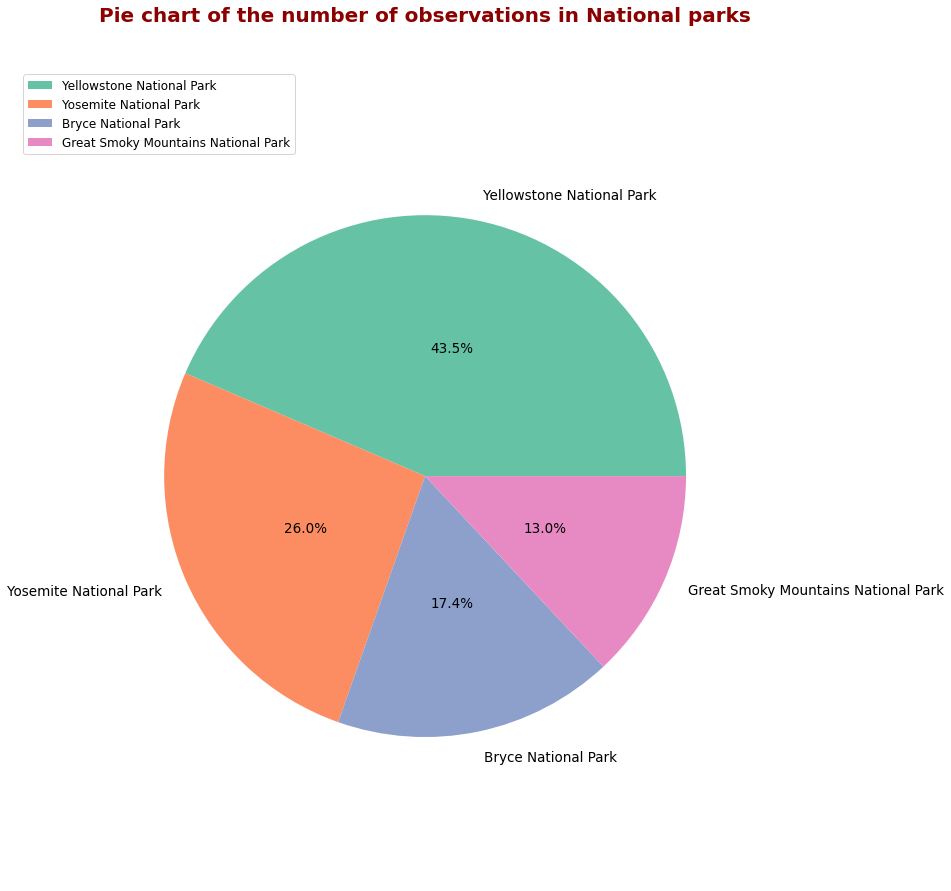

In [839]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.set_palette("Accent")
# plt.suptitle('Pie chart of the number of observations in national parks', fontsize = 25, y = 0.86, color = 'purple')
plt.pie(unique_park_names_sum_of_obs_for_park['Number of observations'], labels = unique_park_names_sum_of_obs_for_park['park_name'], autopct='%1.1f%%', pctdistance = 0.5, radius = 0.8, textprops={'fontsize': 13.5})
plt.legend(loc = 'upper left', fontsize = 12)
ax.set_title('Pie chart of the number of observations in National parks', y = 1.05, fontweight="bold", fontsize = 20, color = 'darkred')
plt.show()
fig.savefig('p.png')

Для более наглядного понимания создадим столбчатую диаграмму, отражающую количество проведённых наблюдений в каждом из Национальных парков

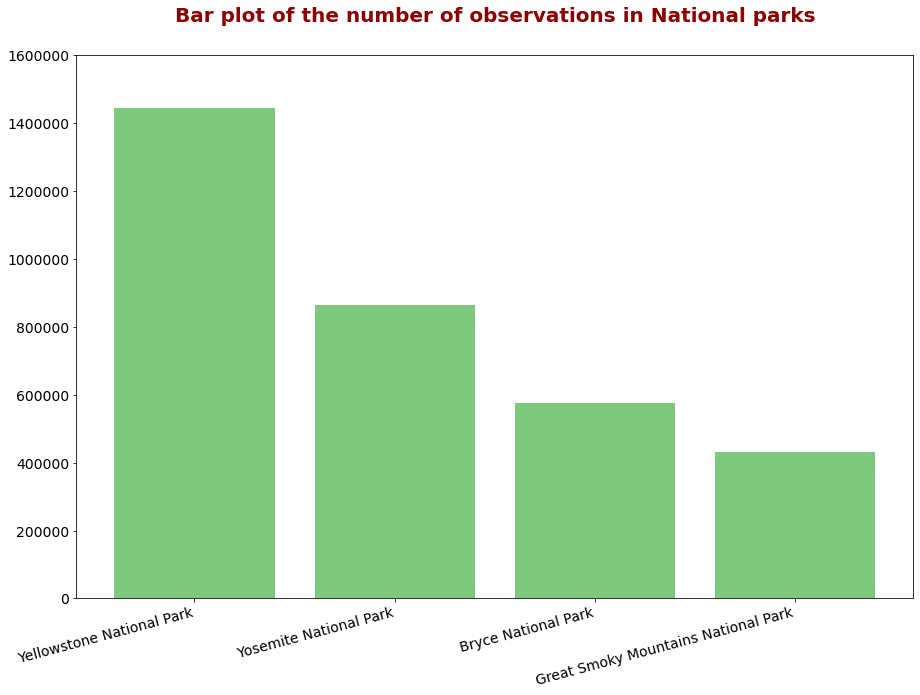

In [840]:
fig, ax2 = plt.subplots(figsize = (15, 10))
sns.set_palette("Accent")
ax2.bar(range(len(unique_park_names_sum_of_obs_for_park['park_name'])), unique_park_names_sum_of_obs_for_park['Number of observations'])
ax2.set_xticks(range(len(unique_park_names_sum_of_obs_for_park['park_name'])))
ax2.set_xticklabels(unique_park_names_sum_of_obs_for_park['park_name'], rotation = 15, ha = 'right', fontsize = 14)
ax2.set_yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000])
ax2.set_yticklabels([0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000],fontsize = 14)
plt.subplots_adjust(wspace = 0.7)
ax2.set_title('Bar plot of the number of observations in National parks', y = 1.05, fontweight="bold", fontsize = 20, color = 'darkred')
plt.show()
fig.savefig('w.png')

Если мы хотим понять, существует ли зависимость между охранным статусом и той или иной группой живых существ, необходимо провести тест для проверки статистической гипотезы. В нашем случае это будет тест хи-квадрата. Сначала нужно создать кросс-таблицу "Xtab", а затем передать её как параметр в функцию chi2_contingency()

In [625]:
Xtab = pd.crosstab(category_conservation_status_not_null['category'], category_conservation_status_not_null['conservation_status'])

In [473]:
print(Xtab)

conservation_status  Endangered  In Recovery  Species of Concern  Threatened
category                                                                    
Amphibian                     1            0                   4           2
Bird                          4            3                  72           0
Fish                          3            0                   4           4
Mammal                        7            1                  28           2
Nonvascular Plant             0            0                   5           0
Reptile                       0            0                   5           0
Vascular Plant                1            0                  43           2


Теперь сформулирем нулевую и альтернативную гипотезы:

H0: зависимость между определённой группой животных и охранным статусом отсутсвует.

H1: зависимость между определённой группой животных и охранным статусом существует.

Уровень значимости (α) = 0.05

Если полученное p-value меньше уровня значимости, то мы отвергаем нулевую гипотезу и принимаем альтернативную гипотезу (и наоборот, если p-value больше заданного уровня значимости).


In [474]:
chi2, pval, dof, expected = chi2_contingency(Xtab)
if pval < 0.05:
    print('P-value we get from Chi-Square Test is {pval}. \nIt is less than significance threshold of 0.05. So we can say with certainty that there is strong association between two categorical variables: category and conservation status.'.format(pval = pval))
else:
    print('P-value we get from Chi-Square Test is {pval}. \nIt is more than significance threshold of 0.05. So we can say with certainty that there is no association between two categorical variables: category and conservation status.'.format(pval = pval))

P-value we get from Chi-Square Test is 1.8909788349761653e-05. 
It is less than significance threshold of 0.05. So we can say with certainty that there is strong association between two categorical variables: category and conservation status.
